RMS 타이타닉은 1912년에 빙산과 충돌해 침몰한 여객선입니다. 타이타닉호의 침몰은 무려 1514명 정도가 사망한 비운의 사건이죠. 영화 ‘타이타닉’으로 인해 이름이 가장 널리 알려진 여객선이기도 합니다.

우리에게 주어진 titanic.csv 파일(다운로드)에는 당시 탑승자들의 정보가 담겨 있습니다. 생존 여부, 성별, 나이, 지불한 요금, 좌석 등급 등의 정보가 있는데요.

생존 여부는 'Survived' column에 저장되어 있습니다. 0이 사망, 1이 생존을 의미합니다.
좌석 등급은 'Pclass' column에 저장되어 있습니다. 1은 1등실, 2는 2등실, 3은 3등실을 의미합니다.
지불한 요금은 'Fare' column에 저장되어 있습니다.
다양한 방면으로 EDA(탐색적 데이터 분석)를 한 후, 다음 보기 중 맞는 것을 모두 고르세요.

In [28]:
import pandas as pd
import seaborn as sns

In [29]:
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: ylabel='Frequency'>

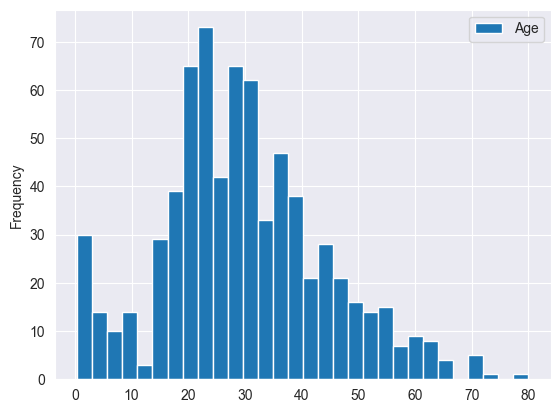

In [30]:
# 1. 나이대 구하기
df.plot(kind='hist' ,y='Age', bins=30)

<Axes: xlabel='Fare', ylabel='Age'>

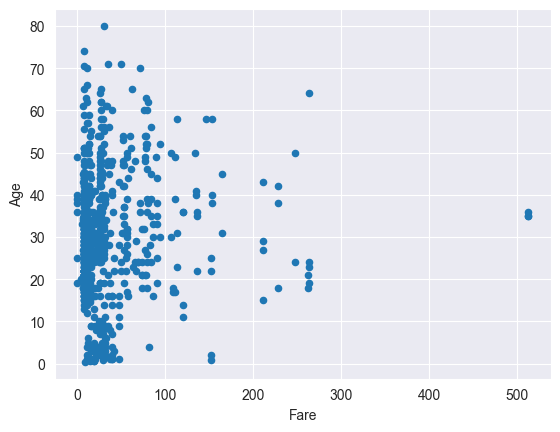

In [31]:
# 2. 나이별 지불금액
df.plot(kind='scatter', y='Age', x='Fare')

In [32]:
# 3. 생존자 수
df.value_counts('Survived')

Survived
0    549
1    342
Name: count, dtype: int64

In [33]:
# 4. 객실등급별 탑승승객 수
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [34]:
# 5. 객실 등급별 생존율 분포
# sns.kdeplot(df['Pclass'], df['Survived'])

In [35]:
# 5. 객실 등급별 생존
df.loc[df['Survived']== 1, 'Pclass'].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [36]:
# 객실 등급별 사망
df.loc[df['Survived']== 0, 'Pclass'].value_counts()

Pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [37]:
# 1번 생존율
f'1등급 생존율: {136 / (136+80)}'

'1등급 생존율: 0.6296296296296297'

In [38]:
f'2등급 생존율: {87 / (87+97)}'

'2등급 생존율: 0.47282608695652173'

In [39]:
f'3등급 생존율: { 119/( 119+372)}'

'3등급 생존율: 0.24236252545824846'

<Axes: xlabel='Survived', ylabel='Age'>

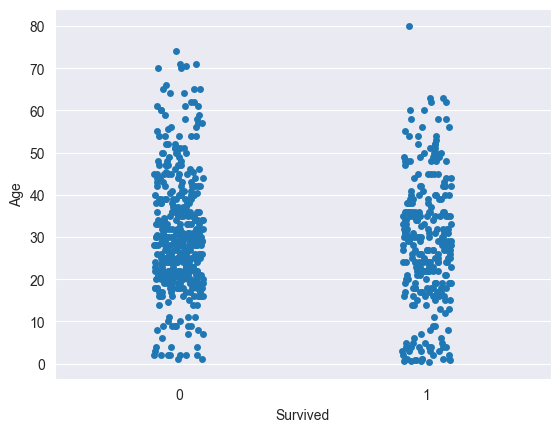

In [40]:
# 6. 나이별 생존율
# 생존 여부에 따른 나이 분포
sns.stripplot(data=df, x="Survived", y="Age")

<Axes: xlabel='Survived', ylabel='Age'>

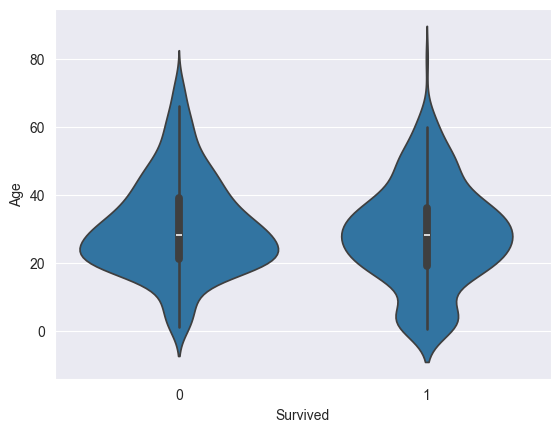

In [41]:
# 생존 여부에 따른 나이 분포
sns.violinplot(data=df, x="Survived", y="Age")

<Axes: xlabel='Survived', ylabel='Age'>

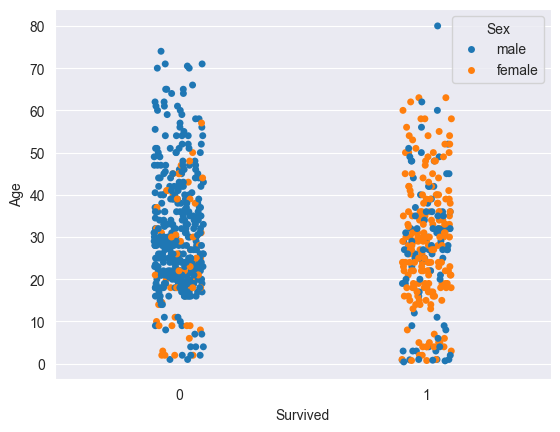

In [42]:
# 보기 7: "나이보다 성별이 생존율에 더 많은 영향을 미친다."
# 생존 여부에 따른 나이 및 성별 분포
sns.stripplot(data=df, x="Survived", y="Age", hue="Sex")